In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df_batsman = df.groupby('batsman')['ball'].count().reset_index()
df_batsman

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


In [6]:
runs = df.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [9]:
four = df[df['batsman_runs']==4]
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,11,4,V Kohli,AB de Villiers,BCJ Cutting,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150407,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,2,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150418,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,1,KL Rahul,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150447,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,6,Sachin Baby,STR Binny,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [11]:
runs_4 = four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns = ['batsman','4s']
runs_4

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [13]:
six = df[df['batsman_runs']==6]
runs6 = six.groupby('batsman')['batsman_runs'].count().reset_index()
runs6.columns = ['batsman','6s']
runs6

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Mishra,5
4,A Mithun,1
...,...,...
296,Y Venugopal Rao,37
297,YK Pathan,149
298,YV Takawale,3
299,Yuvraj Singh,141


In [15]:
player = pd.concat([runs,df_batsman.iloc[:,1], runs_4.iloc[:,1], runs6.iloc[:,1]], axis=1)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0
...,...,...,...,...,...
456,YV Takawale,192,183,NaN,NaN
457,Yashpal Singh,47,67,NaN,NaN
458,Younis Khan,3,7,NaN,NaN
459,Yuvraj Singh,2591,2050,NaN,NaN


In [16]:
player.fillna(0,inplace=True)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0
...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0
457,Yashpal Singh,47,67,0.0,0.0
458,Younis Khan,3,7,0.0,0.0
459,Yuvraj Singh,2591,2050,0.0,0.0


In [18]:
player['sr'] = (player['batsman_runs'] / player['ball'])*100
player

,batsman,batsman_runs,ball,4s,6s,sr
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,5.0,125.000000
4,A Flintoff,62,57,3.0,1.0,108.771930
...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,104.918033
457,Yashpal Singh,47,67,0.0,0.0,70.149254
458,Younis Khan,3,7,0.0,0.0,42.857143
459,Yuvraj Singh,2591,2050,0.0,0.0,126.390244


In [19]:
grp = df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,Royal Challengers Bangalore,6
1,1,BCJ Cutting,Sunrisers Hyderabad,16
2,1,CH Gayle,Royal Challengers Bangalore,32
3,1,DA Warner,Sunrisers Hyderabad,14
4,1,DJ Hooda,Sunrisers Hyderabad,16
...,...,...,...,...
9510,636,SR Watson,Royal Challengers Bangalore,11
9511,636,STR Binny,Royal Challengers Bangalore,9
9512,636,Sachin Baby,Royal Challengers Bangalore,18
9513,636,V Kohli,Royal Challengers Bangalore,54


In [24]:
max_runs = grp.groupby('batsman')['batsman_runs'].max().reset_index()
max_runs.columns = ['batsman', 'max_runs']
max_runs

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24
...,...,...
456,YV Takawale,45
457,Yashpal Singh,20
458,Younis Khan,3
459,Yuvraj Singh,83


In [25]:
player2 = pd.concat([player,max_runs.iloc[:,1]],axis=1)
player2

,batsman,batsman_runs,ball,4s,6s,sr,max_runs
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,36
1,A Chandila,4,7,7.0,1.0,57.142857,4
2,A Chopra,53,75,1.0,2.0,70.666667,24
3,A Choudhary,25,20,5.0,5.0,125.000000,15
4,A Flintoff,62,57,3.0,1.0,108.771930,24
...,...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,104.918033,45
457,Yashpal Singh,47,67,0.0,0.0,70.149254,20
458,Younis Khan,3,7,0.0,0.0,42.857143,3
459,Yuvraj Singh,2591,2050,0.0,0.0,126.390244,83


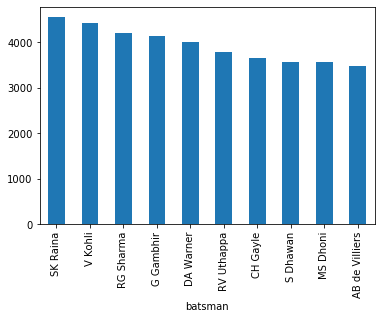

In [31]:
pmax = df.groupby('batsman')['batsman_runs'].sum()
pmax.sort_values(ascending=False)[:10].plot(kind='bar')

In [34]:
grp = df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False)
grp.head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
3686,243,PC Valthaty,Kings XI Punjab,120
4223,279,V Sehwag,Delhi Daredevils,119


In [35]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [36]:
dismissal_kind = ['caught', 'bowled', 'lbw', 'caught and bowled',
                  'stumped', 'hit wicket']

In [38]:
hwt = df[df['dismissal_kind'].isin(dismissal_kind)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


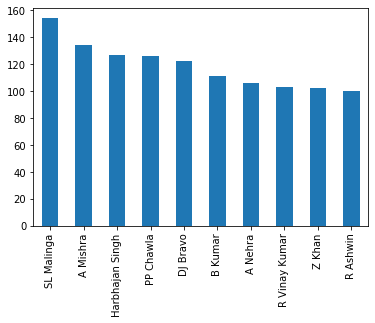

In [39]:
hwt['bowler'].value_counts()[:10].plot(kind='bar')